In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `C:\Users\Zac\BME574`


In [2]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS"])

   Resolving package versions...
  No Changes to `C:\Users\Zac\BME574\Project.toml`
  No Changes to `C:\Users\Zac\BME574\Manifest.toml`


In [3]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS

In [4]:
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [5]:
col_list = Vector{Float64}[]
for p in 0:19
    push!(col_list, x .^ p)
end
A = reduce(hcat,col_list)

100×20 Matrix{Float64}:
 1.0  0.0         0.0          0.0          …  0.0          0.0
 1.0  0.040404    0.00163249   6.5959e-5       8.23467e-26  3.32714e-27
 1.0  0.0808081   0.00652995   0.000527672     2.15867e-20  1.74438e-21
 1.0  0.121212    0.0146924    0.00178089      3.19028e-17  3.86701e-18
 1.0  0.161616    0.0261198    0.00422138      5.65882e-15  9.14557e-16
 1.0  0.20202     0.0408122    0.00824488   …  3.14128e-13  6.34602e-14
 1.0  0.242424    0.0587695    0.0142472       8.36313e-12  2.02743e-12
 1.0  0.282828    0.0799918    0.022624        1.34095e-10  3.79257e-11
 1.0  0.323232    0.104479     0.033771        1.48343e-9   4.79491e-10
 1.0  0.363636    0.132231     0.0480841       1.23598e-8   4.49447e-9
 1.0  0.40404     0.163249     0.065959     …  8.23467e-8   3.32714e-8
 1.0  0.444444    0.197531     0.0877915       4.57841e-7   2.03485e-7
 1.0  0.484848    0.235078     0.113977        2.19234e-6   1.06295e-6
 ⋮                                          ⋱       

In [6]:
# alternative way of constructing the matrix
A2 = zeros(100,20)
for i in 1:100
    for j in 1:20
        A2[i,j] = x[i]^(j-1)
    end
end

In [7]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [8]:
Ainv = pinv(A)

20×100 Matrix{Float64}:
   0.622073      0.371773      0.186868    …  -0.0319533     0.0143243
  -7.08156      -2.76452       0.18683         0.977278     -0.44172
  22.9104        6.42661      -4.29988        -5.42477       2.47062
 -23.3641       -4.48682       7.2468          9.00326      -4.14143
  -5.77438      -2.17972       0.366125       -0.640254      0.336492
  14.5041        2.20884      -5.25478     …  -7.14476       3.30396
   9.11427       2.16097      -2.2924         -1.87808       0.824813
  -8.02308      -0.794782      3.44871         5.78786      -2.71145
 -11.0479       -1.9895        3.59417         4.43744      -2.02942
   3.7694        0.125271     -1.92988        -4.14977       1.97488
  11.0234        1.756        -3.87385     …  -5.57856       2.58267
  -4.29752      -0.30782       1.98405         4.32184      -2.06417
  -9.46551      -1.52701       3.2988          4.80677      -2.22624
  12.0538        1.62078      -4.6041         -8.28592       3.91361
  -6.8

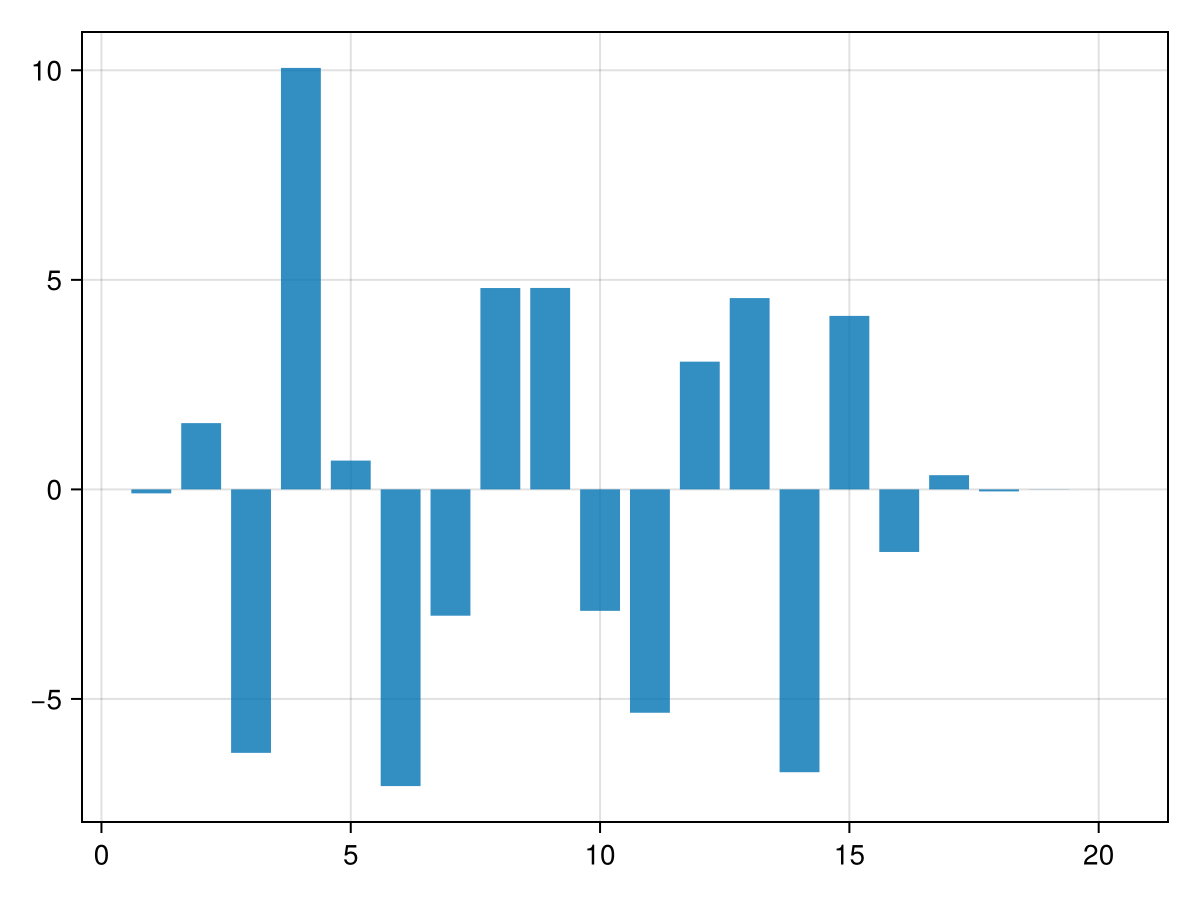

In [9]:
y1 = y .+ rand(Normal(0,0.1),length(y))
b1 = Ainv * y1
barplot(b1)

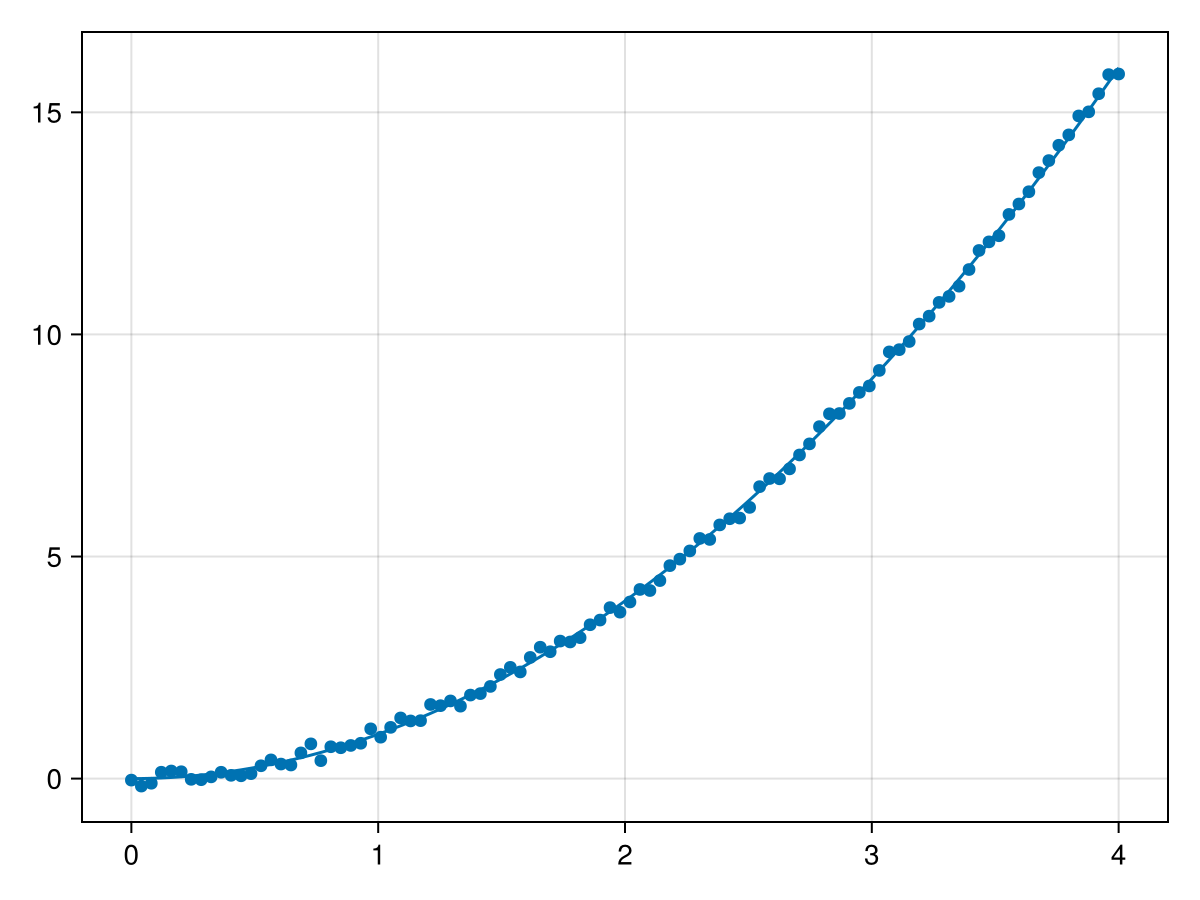

In [10]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,x,y)
plot!(ax,x,y1)
fig

In [11]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(Aslv,y,λ1,λ2)
    xv = Variable(size(Aslv)[2])
    problem = minimize(norm(Aslv*xv-y,2) + λ1*norm(xv,1) + λ2*norm(xv,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(xv))
end

lasso (generic function with 1 method)

In [12]:
b10ls = lasso(A[:,1:10],y1,0.1,0)
b10lq = fitlq(A[:,1:10],y1)

10-element Vector{Float64}:
 -0.06783623909157038
  0.7108479149436779
 -1.6498714457631127
  3.48285908935069
 -0.8306175348308287
 -1.7331842906116366
  1.6141931279296544
 -0.5930977823317707
  0.10236892605450347
 -0.006863393568960797

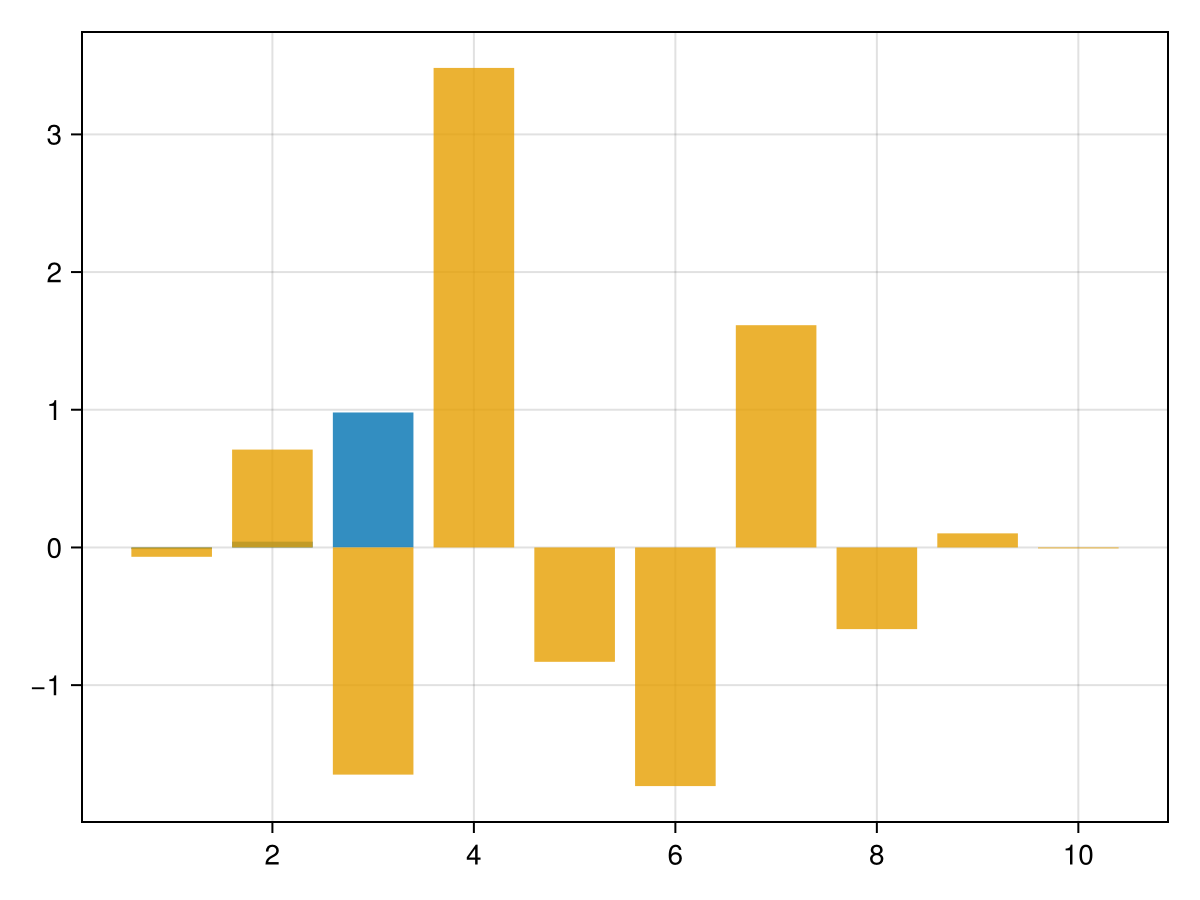

In [13]:
barplot(b10ls)
barplot!(b10lq)
current_figure()

In [14]:
# Lets look at Extrapolations
xx = LinRange(0,8,200)
yy = xx .^ 2

200-element Vector{Float64}:
  0.0
  0.001616120805030176
  0.006464483220120704
  0.014545087245271583
  0.025857932880482815
  0.040403020125754405
  0.05818034898108633
  0.07918991944647863
  0.10343173152193126
  0.13090578520744425
  0.16161208050301762
  0.19555061740865132
  0.23272139592434532
  ⋮
 57.12017373298654
 57.72945127648292
 58.34196106158936
 58.957703088305855
 59.5766773566324
 60.19888386656903
 60.8243226181157
 61.45299361127245
 62.08489684603925
 62.720032322416095
 63.35840004040302
 64.0

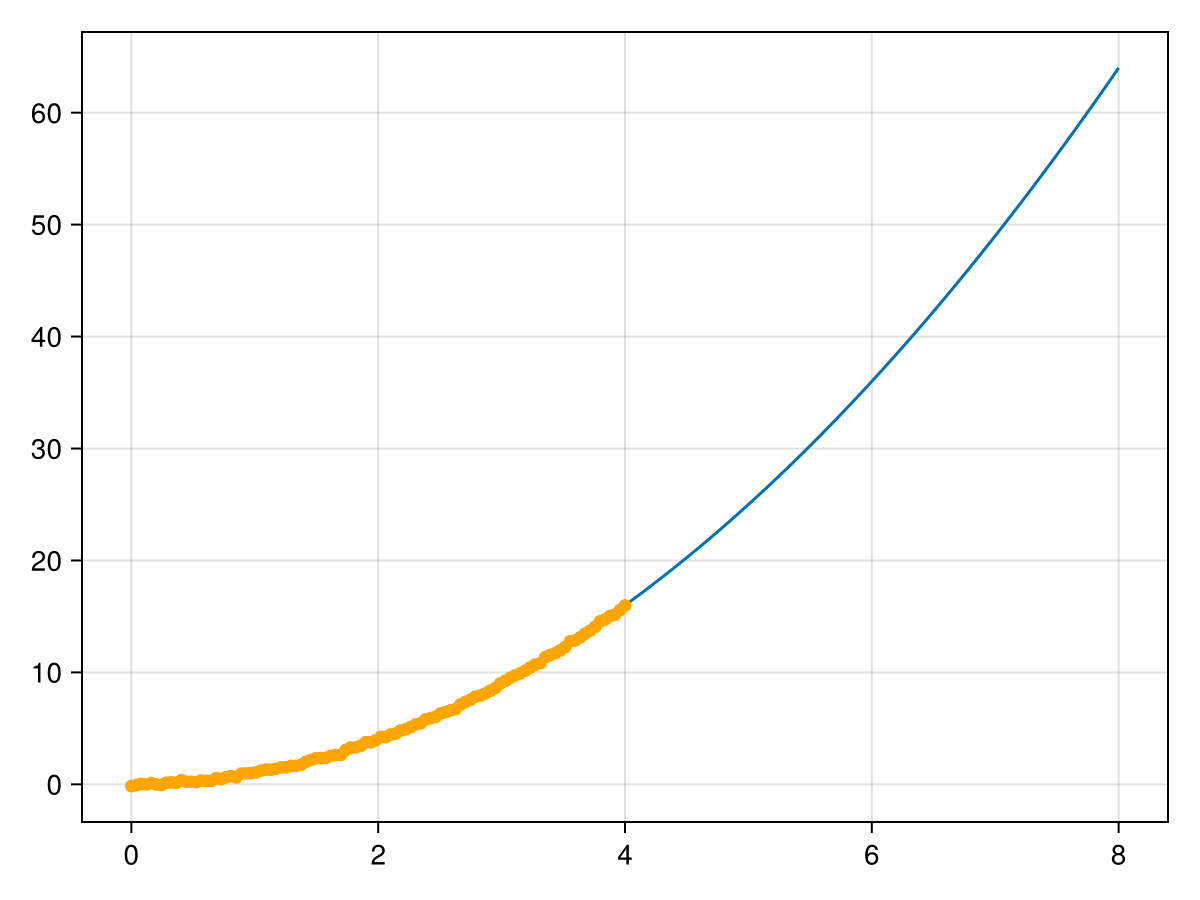

In [15]:
y1 = y .+ rand(Normal(0,0.1),length(y))
lines(xx,yy)
lines!(x,y)
scatter!(x,y1,color="orange")
current_figure()

In [16]:
# larger design matrix
AA = zeros(200,20)
for i in 1:200
    for j in 1:20
        AA[i,j] = xx[i]^(j-1)
    end
end

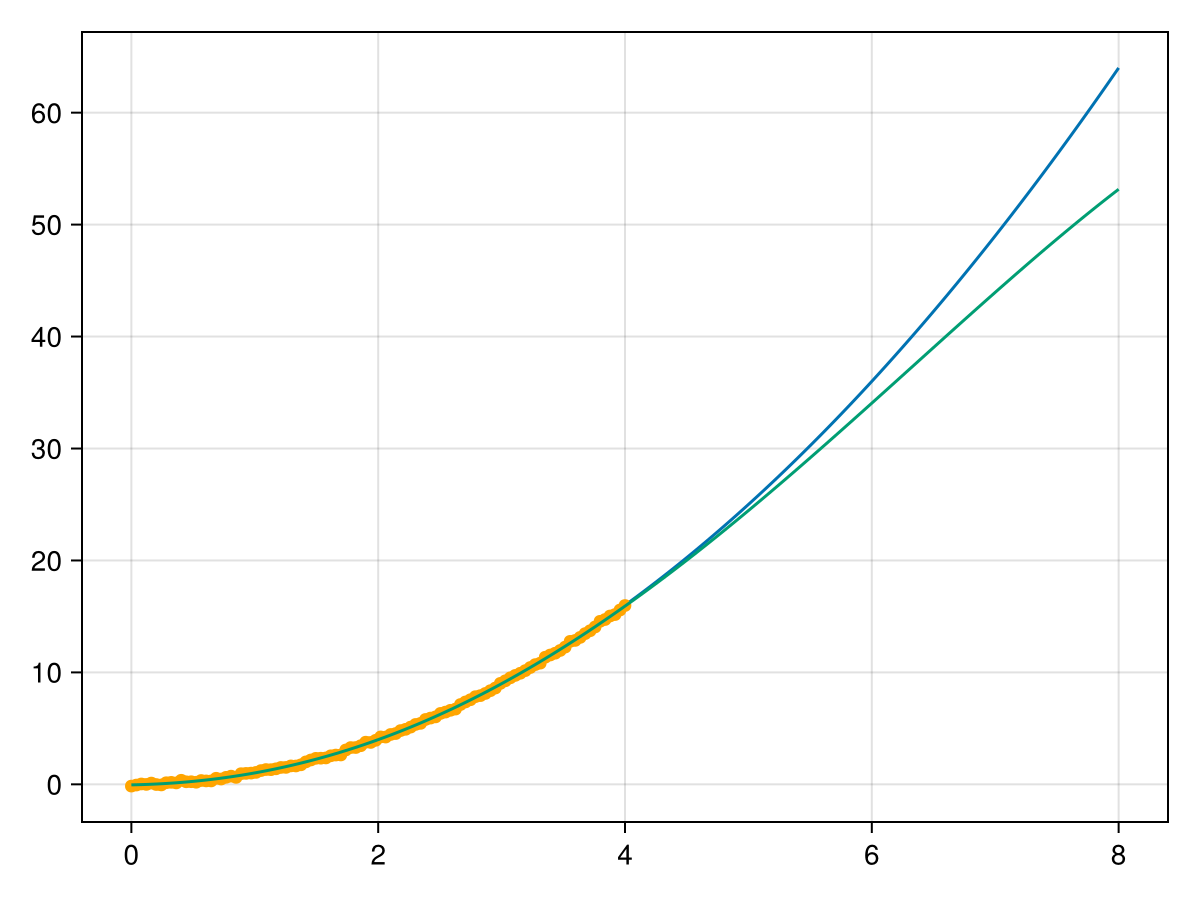

In [17]:
pd = 5
blq = fitlq(A[:,1:pd],y1)
y_ex = AA[:,1:pd]*blq
lines(xx,yy)
lines!(x,y)
scatter!(x,y1,color="orange")
lines!(xx,y_ex)
current_figure()

In [18]:
nmax = 20
nreps = 100

#y100 = y .+ rand(Normal(0,0.2),(length(y),nreps))

y100s = zeros(length(y),nreps);
b100lq = zeros(nmax,nreps)
b100ls = zeros(nmax,nreps)
#b100ls2 = zeros(nmax,nreps)
Ainv2 = pinv(A[:,1:nmax])
y100 = y#this isn't defined outside of the loop unless I Preallocate it?

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [19]:
for ii = 1:nreps
    y100 = y + rand(Normal(0,0.1),length(y))
    y100s[:,ii] = y100
    #b100lq[:,ii] = fitlq(A[:,1:nmax],y100)
    b100lq[:,ii] = Ainv2*y100    
    b100ls[:,ii] = lasso(A[:,1:nmax],y100,10,0)#there seems to be something that ends up fitting this to x^4 or x^6 
    #xv = Variable(size(A[:,1:nmax])[2])
    #problem = minimize(norm(A[:,1:nmax]*xv - y100,2) + 1*norm(xv,1)) #+ 0*norm(xv,2))
    #solve!(problem, SCS.Optimizer; silent=true)
    #b100ls2[:,ii] = vec(evaluate(xv))
end

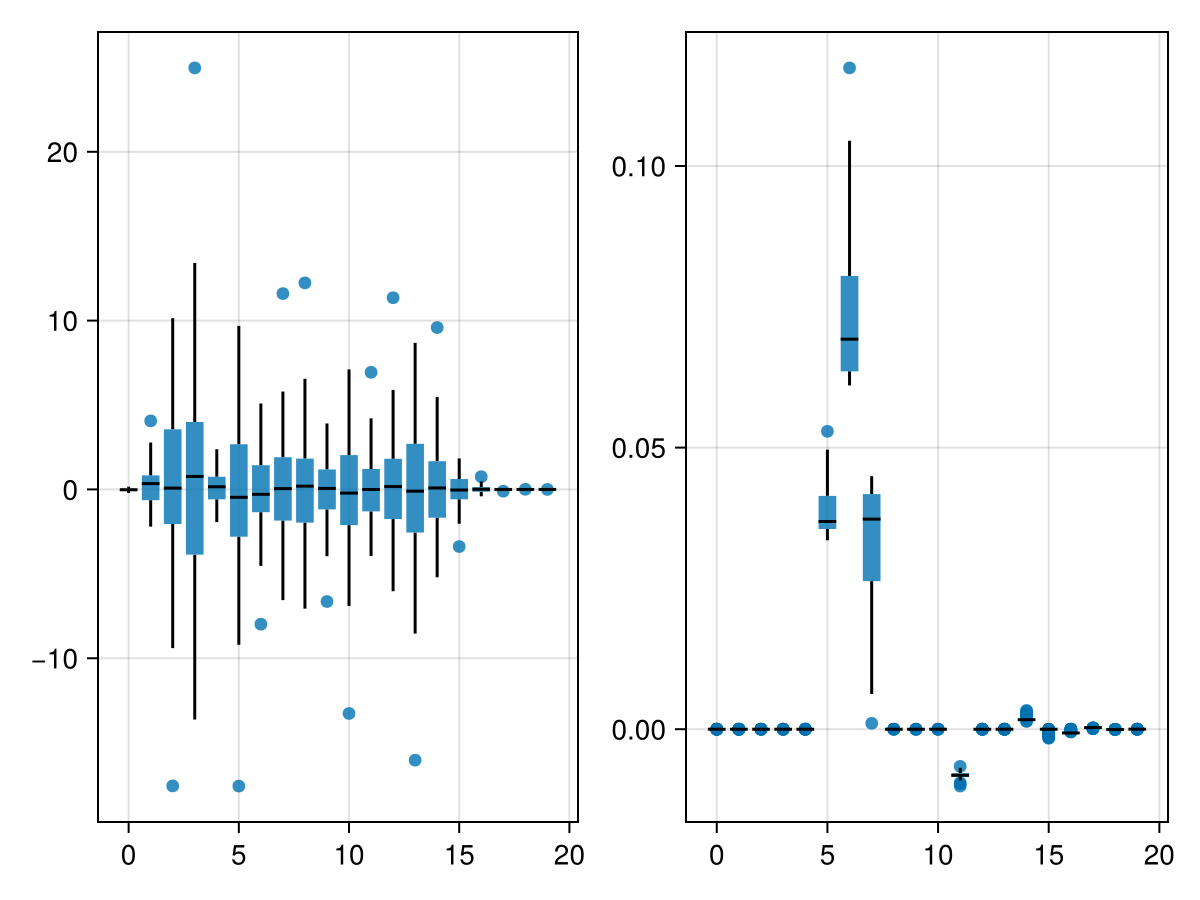

In [20]:
#fig = Figure()
#lsAx = Axis([1,2])
inds = zeros(nmax,nreps)
for ii = 1:size(inds)[1]
    for jj = 1:size(inds)[2]
        inds[ii,jj] = ii-1
    end
end

fig2 = Figure()
ax21 = Axis(fig2[1,1])
boxplot!(ax21,inds[:],b100lq[:])
ax22 = Axis(fig2[1,2])
boxplot!(ax22,inds[:],b100ls[:])
#ax23 = Axis(fig2[1,3])
#boxplot!(ax23,inds[:],b100ls2[:])
fig2

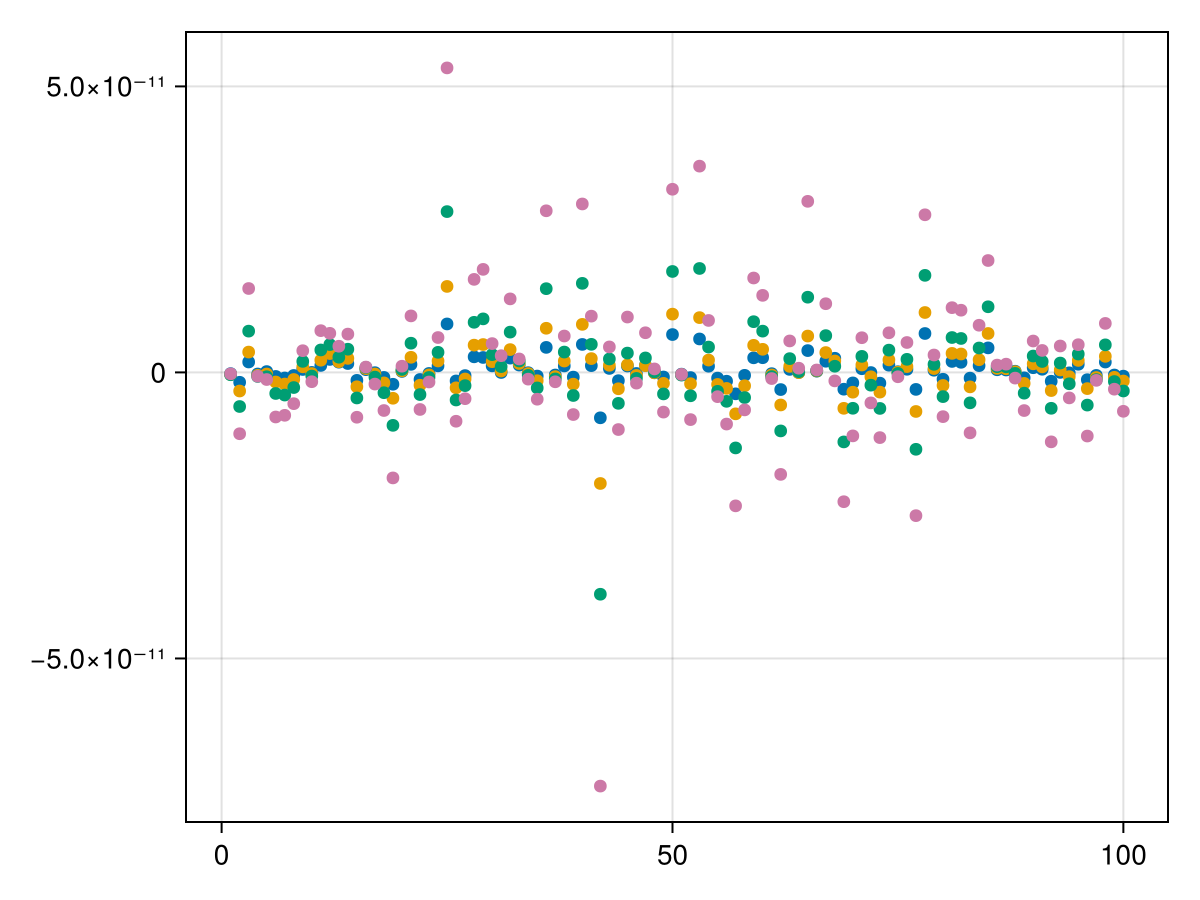

In [21]:
fig3 = Figure()
ax3 = Axis(fig3[1,1])
plot!(ax3,1:nreps,b100ls[2,1:nreps])
plot!(ax3,1:nreps,b100ls[3,1:nreps])
plot!(ax3,1:nreps,b100ls[4,1:nreps])
plot!(ax3,1:nreps,b100ls[5,1:nreps])
fig3

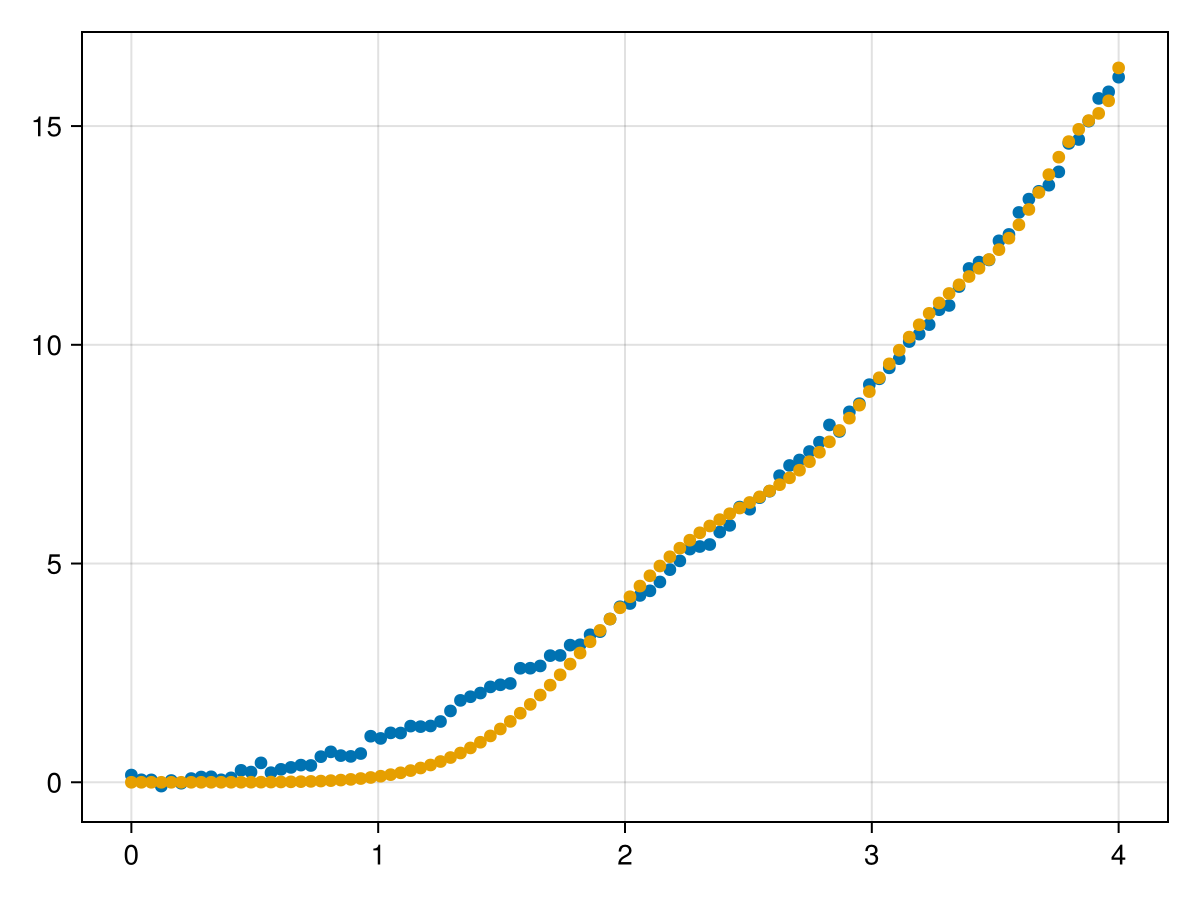

In [22]:
fig4 = Figure()
ax4 = Axis(fig4[1,1])
plot!(ax4,x,y100)
plot!(ax4,x,A[:,1:nmax]*mean(b100ls[:,end],dims = 2))
fig4